<a href="https://colab.research.google.com/github/chadwill05/FIS-Interview-Fraud-Analysis/blob/main/FIS_Fraud_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CARD FRAUD ANALYSIS**

In this notebook I will be uncovering fraud with merchant accounts with a ficticious dataset provided by FIS.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import psycopg2
import pandas.io.sql as sqlio

In [ ]:
df = pd.read_csv('fraud_data.csv')

EDA

In [ ]:
df.head()

,Trn Auth Post,Trn Pos Ent Cd,Sic Cd,Sic Desc,Mer Cnty Cd,Cntry,Mer St,Mer Cty,Mer Nm,Acct Nbr,...,Mer Id,Terminal Id,Terminal Entry Cap,Client 2 Xid,Trn Amt,Fraud_Score_Bands,BIN,Average Risk Score,POS_Entry_Mode,Merchant_Location
0,A,C,5621,Women's Ready-to-Wear Stores,840,UNITED STATES,IL,ROSEMONT,0440 FOREVER 21,9.545950e+15,...,3.34613E+11,5394188,N,5.011003e+10,188.81,0-99,954595,285.0,Contactless,"Rosemont, Il, United States"
1,A,C,6011,Financial Institutions - Automated Tellers/Cas...,840,UNITED STATES,WI,OSHKOSH,BMO HARRIS BANK NA,9.545950e+15,...,NaN,AK606367,C,NaN,500.00,0-99,954595,500.0,Contactless,"Oshkosh, Wi, United States"
2,A,D,5311,Department Stores,840,UNITED STATES,IL,ROSEMONT,NORDSTROM #0289,9.545950e+15,...,4.44502E+12,64496001,D,5.011003e+10,59.64,200-299,954595,612.0,Contactless,"Rosemont, Il, United States"
3,A,D,5411,"Grocery Stores, Supermarkets",840,UNITED STATES,MO,SAINT LOUIS,TARGET T-1515,9.545950e+15,...,4.445E+12,31515151,D,NaN,1.10,0-99,954595,345.0,Contactless,"Saint Louis, Mo, United States"
4,A,D,5541,Service Stations With or Without Ancillary Ser...,840,UNITED STATES,IL,WOOD DALE,7-ELEVEN,9.545950e+15,...,4.40007E+12,00MTQV01,D,5.011003e+10,11.31,0-99,954595,317.0,Contactless,"Wood Dale, Il, United States"


In [ ]:
df.describe


<bound method NDFrame.describe of     Trn Auth Post Trn Pos Ent Cd  Sic Cd  \
0               A              C    5621   
1               A              C    6011   
2               A              D    5311   
3               A              D    5411   
4               A              D    5541   
..            ...            ...     ...   
721             A              U    6011   
722             A              V    5541   
723             A              V    5541   
724             A              V    5541   
725             A              E    7523   

                                              Sic Desc  Mer Cnty Cd  \
0                         Women's Ready-to-Wear Stores          840   
1    Financial Institutions - Automated Tellers/Cas...          840   
2                                    Department Stores          840   
3                         Grocery Stores, Supermarkets          840   
4    Service Stations With or Without Ancillary Ser...          840   
..         

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Trn Auth Post       726 non-null    object 
 1   Trn Pos Ent Cd      726 non-null    object 
 2   Sic Cd              726 non-null    int64  
 3   Sic Desc            581 non-null    object 
 4   Mer Cnty Cd         726 non-null    int64  
 5   Cntry               726 non-null    object 
 6   Mer St              717 non-null    object 
 7   Mer Cty             726 non-null    object 
 8   Mer Nm              726 non-null    object 
 9   Acct Nbr            726 non-null    float64
 10  Frd Scor            726 non-null    int64  
 11  Ext Scor2           726 non-null    int64  
 12  Ext Scor1           726 non-null    int64  
 13  Rltm Req            2 non-null      object 
 14  Usr Ind 4           726 non-null    object 
 15  Mer Id              725 non-null    object 
 16  Terminal

Q1: What is the distribution of fraud scores across the dataset?

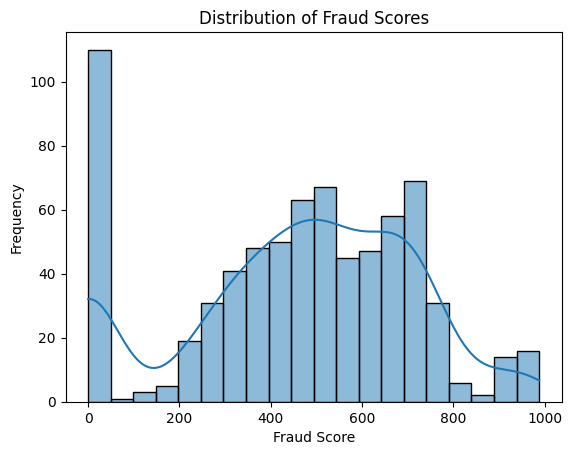

In [ ]:
sns.histplot(df['Frd Scor'], bins=20, kde=True)
plt.title('Distribution of Fraud Scores')
plt.xlabel('Fraud Score')
plt.ylabel('Frequency')
plt.show()


The histogram shows the distribution of fraud scores across the dataset. The distribution is multimodal, which means it has several peaks. There is a significant peak at the lower end near a fraud score of 0, indicating a high frequency of transactions with very low fraud scores. This suggests that most transactions do not have indications of fraud.

There are additional, smaller peaks spread out across the fraud score spectrum, with noticeable peaks around the 200, 400, and 600 marks. There's also a minor peak near the 800 mark. The frequency of transactions decreases as the fraud score increases, which is typically expected in fraud analysis — as higher scores would ideally represent more rare, higher-risk transactions.

Overall, this distribution suggests that while most transactions are likely non-fraudulent, there are various thresholds where fraudulent activity is more frequently suspected or identified.

Q2: How do transaction amounts vary across different fraud score bands?



In [ ]:
df.groupby('Fraud_Score_Bands')['Trn Amt'].describe()


,count,mean,std,min,25%,50%,75%,max
Fraud_Score_Bands,,,,,,,,
0-99,111.0,12.523153,69.667313,0.00,0.0000,0.000,0.0000,502.28
100-199,8.0,17.965000,16.212265,0.99,7.7650,12.500,27.9175,45.00
200-299,51.0,15.827647,24.539945,0.55,10.0000,10.000,10.0000,159.00
300-399,90.0,12.585333,22.564361,0.00,10.0000,10.000,10.0000,160.00
400-499,116.0,10.654052,12.507127,0.00,10.0000,10.000,10.0000,89.29
500-599,115.0,11.016435,10.941039,0.00,10.0000,10.000,10.0000,90.00
600-699,106.0,15.718868,45.379342,0.00,10.0000,10.000,10.0000,440.00
700-799,92.0,10.105761,17.468454,0.00,1.0675,10.000,10.0000,155.00
800-849,6.0,97.716667,179.100697,0.99,10.0000,24.900,59.0825,460.00


Most transaction amounts are concentrated in lower fraud score bands with relatively low mean values. However, there is a noticeable increase in the mean and maximum transaction amounts in certain higher fraud score bands ( 800-849), although these bands have fewer transactions. This could indicate that higher fraud scores might be associated with higher transaction amounts in some cases, but this is not a consistent trend across all bands. The data also shows a significant amount of variability within the bands, which is reflected in the standard deviations and the differences between the 75th percentile and maximum values.

Q3: Which merchants have the highest number of transactions?

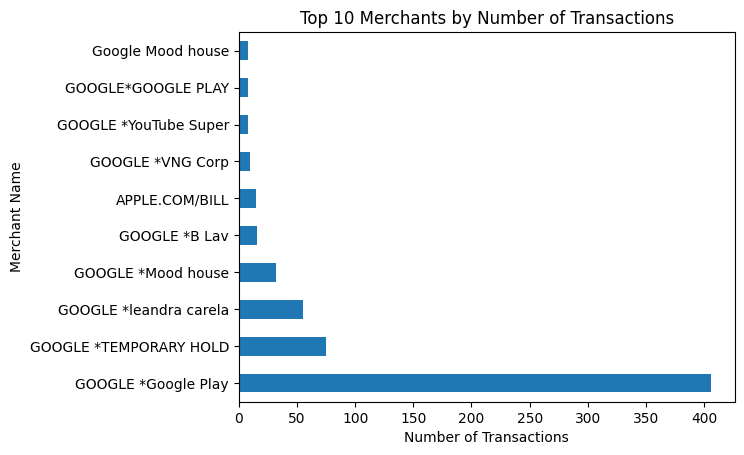

In [ ]:
#Barchart to display top 10 merchants
df['Mer Nm'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Merchants by Number of Transactions')
plt.xlabel('Number of Transactions')
plt.ylabel('Merchant Name')
plt.show()


*GOOGLE Google Play: Holds the top position with the greatest number of transactions, significantly higher than the others.

This list is indicative of the merchants that are most frequently transacted with within the dataset, and it suggests that Google services constitute a majority of the top transactions, which is not uncommon given the prevalence of Google in digital transactions. The presence of "APPLE.COM/BILL" also indicates the significance of Apple services. Understanding the transaction volumes for these merchants can be crucial for fraud analysis, as high-volume merchants can be prime targets for fraudulent activity.

Q4: Is there a relationship between transaction amount and fraud score?

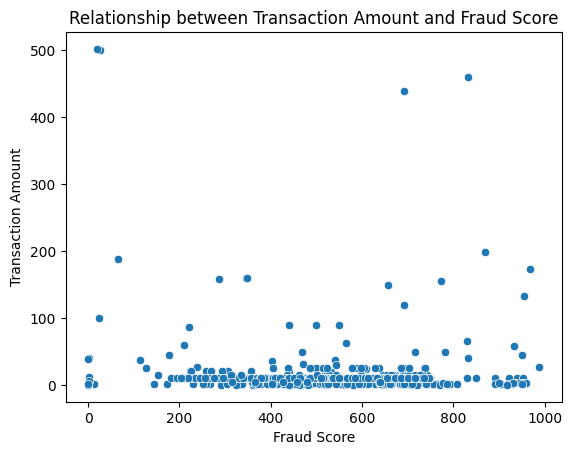

In [ ]:
#Created scatter plot
sns.scatterplot(x='Frd Scor', y='Trn Amt', data=df)
plt.title('Relationship between Transaction Amount and Fraud Score')
plt.xlabel('Fraud Score')
plt.ylabel('Transaction Amount')
plt.show()


In conclusion, while there are some outliers with high transaction amounts across various fraud scores, the plot does not show a clear pattern or trend that would indicate a direct relationship between the transaction amount and the fraud score. This suggests that fraud score, as represented in this data, may not be a reliable indicator of the transaction amount or vice versa.

Q5: How does the average risk score differ by POS entry mode?

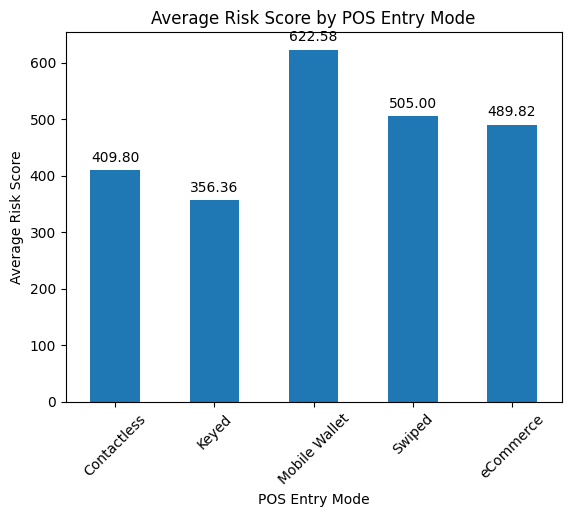

In [ ]:
# Group by 'pos_entry_mode' and calculate mean of 'average_risk_score'
avg_risk_scores = df.groupby('POS_Entry_Mode')['Average Risk Score'].mean()

# Create the bar plot
ax = avg_risk_scores.plot(kind='bar')
plt.title('Average Risk Score by POS Entry Mode')
plt.xlabel('POS Entry Mode')
plt.ylabel('Average Risk Score')
plt.xticks(rotation=45)

# Annotate each bar with the exact value
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()


As per the chart above. Mobile Wallet provided the most amount of risk compared to other types of payments.

Mobile Wallet: This mode has the highest average risk score at 622.58, indicating that transactions made through mobile wallet POS entry modes are, on average, considered to be the riskiest according to your model.

Swiped: The next highest average risk score is for transactions that are swiped, with a score of 505.00. This suggests that swiped transactions are generally seen as risky, but less so compared to mobile wallet entries.

eCommerce: Online transactions have an average risk score of 489.82, which is slightly lower than swiped transactions but still on the higher end of the risk spectrum.

Contactless: These transactions have an average risk score of 409.80, which indicates a moderate risk level among the POS entry modes.

Keyed: The lowest average risk score is for keyed entry transactions, at 356.36, suggesting that these are considered the least risky on average.

The differences in average risk scores between the POS entry modes could be due to the varying levels of security each method inherently has or due to the patterns of fraud that are typically associated with each type of transaction. For example, mobile wallets might have a higher risk score due to the ease of adding stolen credit card information to these apps, while keyed entries might be lower risk due to additional verification steps often required for these transactions.

BENFORDS LAW ANALYSIS

Benfords Law states that any random numbers will have a specific result as to which digits apprears first in each dataset.

In [ ]:
def first_digit(num):
    return int(str(num)[0])

# Apply the function to your column (e.g., 'trn_amt')
df['first_digit'] = df['Trn Amt'].apply(first_digit)


In [ ]:
# Count the occurrence of each digit
digit_count = df['first_digit'].value_counts().sort_index()

# Calculate the percentage
digit_percentage = digit_count / digit_count.sum() * 100

# Expected distribution according to Benford's Law for the first digit
benfords_law = [np.log10(1 + 1/d) * 100 for d in range(1, 10)]


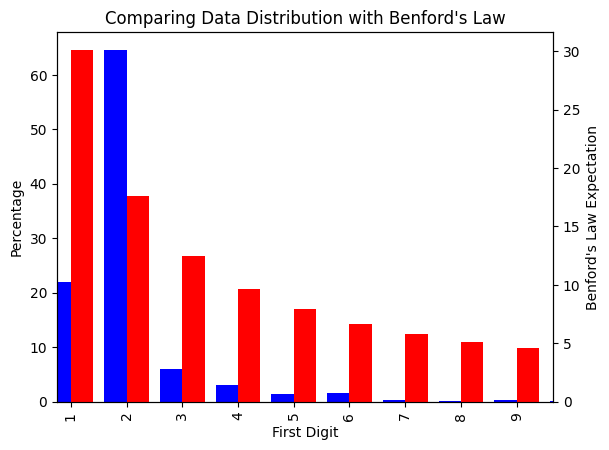

In [ ]:
fig, ax = plt.subplots()

# Plot actual distribution
digit_percentage.plot(kind='bar', color='blue', ax=ax, width=0.4, position=1)

# Plot Benford's distribution
ax2 = ax.twinx()
pd.Series(benfords_law, index=range(1, 10)).plot(kind='bar', color='red', ax=ax2, width=0.4, position=0)

ax.set_xlabel('First Digit')
ax.set_ylabel('Percentage')
ax2.set_ylabel('Benford\'s Law Expectation')

plt.title('Comparing Data Distribution with Benford\'s Law')
plt.show()


However, it's important to note that Benford's Law is not a definitive test for fraud or data manipulation; it's a tool that can help identify data that warrants further investigation.

Benford's Law can be a useful tool for spotting anomalies, it's not conclusive evidence of fraud or error. Other factors and domain-specific knowledge should also be considered when investigating irregularities. If certain digits are significantly over- or under-represented in your dataset, it could warrant a more detailed examination of the transactions associated with those digits.

As you can see. The blue bars represent our data and the red bars represent Benford's law. According to the law their is possible anomalies in the datset and needs to be further investigated.

# **CONCLUSION**

With this being a mock dataset. It was difficult to decipher without datetime analysis. I would've prefered if it was included but I am exicited to further my fraud analysis with FIS for the many years to come. I believe I can make a lasting impact and continue to expand on my skillset.

From the analysis we can see that the Google and Apple services had the most associated transactions in this dataset. We have also seen transactions done by "Mobile Wallet" carried the highest risk. We can draw assumptions from the data to show that mobile wallet has the least amount of security compared to other types of payments and fraudulent orders can be possibly be seen more with this type of payment system.

After this analysis, I for one will focus on using key for my future transactions and stay far away from mobile wallet and swiped payments.